# Installation instructions

### Windows
1. from the command prompt run: "conda update --all"
2. from the command prompt run: "pip install pydot-ng"
3. download and install graphviz: http://www.graphviz.org/
4. run the test code in the cell below


- you may need to run the command prompt as Administrator. For this, search for the command prompt shortcut, right click on it, and select the option "run as administrator".
- you may also need to manually add to the PATH variable the location of the folders where anaconda and graphviz were installed: (e.g., C:\Program Files (x86)\Graphviz2.38\bin, and C:\Program Files\Anaconda3\Scripts). See https://www.java.com/en/download/help/path.xml for instructions on adding folders to the PATH variable.

### Mac users
1. from the terminal run: "conda update --all"
2. from the terminal run: "pip install pydot-ng"
3. download and install graphviz: http://www.graphviz.org/Download_macos.php (version choice: lion)
4. run the test code in the cell below


- in case of the error "InvocationException: Program terminated with status: -5. stderr follows: dyld: Library not loaded: /usr/lib/libltdl.7.dylib": 
    - from the terminal run: "brew install libtool --universal"
    - from the terminal run: "brew link libtool"
- in case you of the error "InvocationException: Program terminated with status: 1. stderr follows: Format: "pdf" not recognized.": 
     - download and install XQuartz: (https://www.xquartz.org/)


In [1]:
# packages used in this lecture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot_ng as pydot # visualization of trees (among many others)
%matplotlib inline

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from IPython.display import Image # displaying images files in jupyter
from IPython.display import IFrame # displaying pdf file in jupyter

# test code for visualization library
pydot.graph_from_dot_file('tree.dot').write_pdf('tree.pdf') 
IFrame('tree.pdf', width=200, height=200) 
graph = pydot.Dot(graph_type='graph')
edge = pydot.Edge("Rochester", "Simon")
graph.add_edge(edge)
graph.write_png('rochester.png')
IFrame('rochester.png', width=200, height=200) 

<br><br><br><br><br><br><br><br><br>

<center>
<h1>Lecture 4: Combining models</h1>
<br>
<h3>Advanced Business Analytics (CIS442D/85)</h3>
<h3>Simon Business School</h3>
<h3>1/25/2017</h3>
</center> 

Some of the figures in this presentation are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani 
(<a href="http://www-bcf.usc.edu/~gareth/ISL/">link</a>)

<br><br><br><br><br><br><br><br><br>
___

# Combining models


## Lecture outline
Goal: learn how multiple models (e.g., classifiers) can be combined to form a stronger model

1. Tree based prediction models
2. Bootstrap aggregating (bagging)
3. Random forests
4. Boosting

<br><br><br><br>

___
# Part 1: Tree based prediction models

## (1.1) Tree based prediction models

- A simple combination method
- Can be used for regesssion and classification
- Main idea
    - split the input space to regions
    - assign a model/value to each region


<br><br><br><br>
___

## (1.2) Example
Major League Baseball Data from the 1986 and 1987 seasons
(Source: https://cran.r-project.org/web/packages/ISLR/ISLR.pdf)

Objective: predict players salary

In [2]:
hitters = pd.read_csv("hitters.csv",delimiter=" ").dropna()
print(hitters.shape)
hitters.head()

(263, 20)


AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
-Alan Ashby          315    81      7    24   38     39     14    3449    835   
-Alvin Davis         479   130     18    66   72     76      3    1624    457   
-Andre Dawson        496   141     20    65   78     37     11    5628   1575   
-Andres Galarraga    321    87     10    39   42     30      2     396    101   
-Alfredo Griffin     594   169      4    74   51     35     11    4408   1133   

                   CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  \
-Alan Ashby            69    321   414     375      N        W      632   
-Alvin Davis           63    224   266     263      A        W      880   
-Andre Dawson         225    828   838     354      N        E      200   
-Andres Galarraga      12     48    46      33      N        E      805   
-Alfredo Griffin       19    501   336     194      A        W      282   

                   Assists  Errors  Salary NewLeague  
-Alan Ashby             43      10   475.0         N  
-Alvin Davis            82      14   480.0         A  
-Andre Dawson           11       3   500.0         N  
-Andres Galarraga       40       4    91.5         N  
-Alfredo Griffin       421      25   750.0         A

In [3]:
hitters.describe()

AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   403.642586  107.828897   11.619772   54.745247   51.486692   41.114068   
std    147.307209   45.125326    8.757108   25.539816   25.882714   21.718056   
min     19.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    282.500000   71.500000    5.000000   33.500000   30.000000   23.000000   
50%    413.000000  103.000000    9.000000   52.000000   47.000000   37.000000   
75%    526.000000  141.500000   18.000000   73.000000   71.000000   57.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years        CAtBat        CHits      CHmRun        CRuns  \
count  263.000000    263.000000   263.000000  263.000000   263.000000   
mean     7.311787   2657.543726   722.186312   69.239544   361.220532   
std      4.793616   2286.582929   648.199644   82.197581   331.198571   
min      1.000000     19.000000     4.000000    0.000000     2.000000   
25%      4.000000    842.500000   212.000000   15.000000   105.500000   
50%      6.000000   1931.000000   516.000000   40.000000   250.000000   
75%     10.000000   3890.500000  1054.000000   92.500000   497.500000   
max     24.000000  14053.000000  4256.000000  548.000000  2165.000000   

              CRBI       CWalks      PutOuts     Assists      Errors  \
count   263.000000   263.000000   263.000000  263.000000  263.000000   
mean    330.418251   260.266160   290.711027  118.760456    8.593156   
std     323.367668   264.055868   279.934575  145.080577    6.606574   
min       3.000000     1.000000     0.000000    0.000000    0.000000   
25%      95.000000    71.000000   113.500000    8.000000    3.000000   
50%     230.000000   174.000000   224.000000   45.000000    7.000000   
75%     424.500000   328.500000   322.500000  192.000000   13.000000   
max    1659.000000  1566.000000  1377.000000  492.000000   32.000000   

            Salary  
count   263.000000  
mean    535.925882  
std     451.118681  
min      67.500000  
25%     190.000000  
50%     425.000000  
75%     750.000000  
max    2460.000000

<br><br><br><br>
___
## (1.3) Regression tree 

- Prediction of continuous values

<br>

<img src="figures/example-reg.png"/>

- Trees: internal nodes, terminal (leaf) nodes, branches
- Single prediction for leaf nodes

In [4]:
hitters['>500K']=hitters['Salary']>=500
hitters.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
-Alan Ashby          315    81      7    24   38     39     14    3449    835   
-Alvin Davis         479   130     18    66   72     76      3    1624    457   
-Andre Dawson        496   141     20    65   78     37     11    5628   1575   
-Andres Galarraga    321    87     10    39   42     30      2     396    101   
-Alfredo Griffin     594   169      4    74   51     35     11    4408   1133   

                   CHmRun  ...    CRBI  CWalks  League Division PutOuts  \
-Alan Ashby            69  ...     414     375       N        W     632   
-Alvin Davis           63  ...     266     263       A        W     880   
-Andre Dawson         225  ...     838     354       N        E     200   
-Andres Galarraga      12  ...      46      33       N        E     805   
-Alfredo Griffin       19  ...     336     194       A        W     282   

                   Assists  Errors  Salary  NewLeague  >500K  
-Alan Ashby             43      10   475.0          N  False  
-Alvin Davis            82      14   480.0          A  False  
-Andre Dawson           11       3   500.0          N   True  
-Andres Galarraga       40       4    91.5          N  False  
-Alfredo Griffin       421      25   750.0          A   True  

[5 rows x 21 columns]

## (1.4) Classification tree 

 - Prediction of classes (binary or finite number of values)
<br>

<img src="figures/example-class.png"/>



<br><br><br><br>
___
## (1.5) Graphical interpretation

<table width="80%"  border-style="none">
<tr><td width="40%">
<img src="figures/example-reg.png"/>
</td>
<td width="40%">
<img src="Chapter8/8.2-1.png"/>
</td>
</tr>
</table>

<!--img src="figures/example-reg.png" width="40%" height="40%"/-->
<!--img src="Chapter8/8.2-1.png" width="40%" height="40%"/-->


<br><br><br><br><br>
___
## (1.6) Learning the tree

- How to construct the tree?
    1. which variables to use for branching?
    2. what are the threshold values?
    3. which values (which models) to use in each region? 
    4. when to stop splitting?
- Hard optimization problem 
- CART, ID3, C4.5 - algorithms (heuristics) for constructing trees

<br><br><br><br><br>


### Example: constructing a decision stump

- Stump: decision tree with a single branching
- Find the best stump
- Using the feature 'Years' to predict 'Salary'

In [5]:
# training data with a single feature (Years) and output (Salary)
hitters[['Years','Salary']].head()

Years  Salary
-Alan Ashby           14   475.0
-Alvin Davis           3   480.0
-Andre Dawson         11   500.0
-Andres Galarraga      2    91.5
-Alfredo Griffin      11   750.0

In [6]:
X = hitters[['Years']]
Y = hitters['Salary']

In [7]:
# list of values for branching
years = hitters['Years'].unique()
years.sort()
years

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 24], dtype=int64)

In [8]:
# helper function for computing the residuals sum of squares (RSS)
def compute_RSS(outputs, prediction):
    return(((outputs-prediction)**2).sum())

In [9]:
# Baseline: Prediction errors without branching
prediction_root = hitters['Salary'].mean()
RSS_root = compute_RSS(hitters['Salary'], prediction_root)
MSE_root = RSS_root/hitters.shape[0]
print(prediction_root)
print(RSS_root)
print(MSE_root)

535.9258821292775
53319112.78864536
202734.26915834736


In [10]:
# compute prediction errors for every branching value of Years
res = []
for year in years[:-1]:
    left = hitters.ix[hitters['Years']<=year]
    right = hitters.ix[hitters['Years']>year]
    
    prediction_left = left['Salary'].mean()
    prediction_right = right['Salary'].mean()
    
    RSS_left = compute_RSS(left['Salary'], prediction_left)
    RSS_right = compute_RSS(right['Salary'], prediction_right)
    RSS_branch = RSS_left+RSS_right
    
    MSE_left = RSS_left/left.shape[0]
    MSE_right = RSS_right/right.shape[0]
    
    res.append([year,RSS_root,RSS_branch,prediction_left,prediction_right,prediction_root,MSE_left,MSE_right,MSE_root])
    #print(year,RSS_root,RSS_left+RSS_right)

df = pd.DataFrame(data=res, columns=['year','RSS_root','RSS_branch','prediction_left','prediction_right','prediction_root','MSE_left','MSE_right','MSE_root'])
df.head()

year      RSS_root    RSS_branch  prediction_left  prediction_right  \
0     1  5.331911e+07  5.060723e+07       149.647059        562.619947   
1     2  5.331911e+07  4.790870e+07       186.916658        594.869662   
2     3  5.331911e+07  4.312088e+07       181.368274        645.291910   
3     4  5.331911e+07  4.016262e+07       225.831478        697.246671   
4     5  5.331911e+07  4.204539e+07       302.856319        719.844721   

   prediction_root       MSE_left      MSE_right       MSE_root  
0       535.925882   38087.904844  203088.344810  202734.269158  
1       535.925882  119937.872025  192671.368499  202734.269158  
2       535.925882   76941.370776  190798.573169  202734.269158  
3       535.925882   75213.015232  193025.735330  202734.269158  
4       535.925882  119388.400863  191811.775103  202734.269158

In [11]:
# RSS vs. year (branching value)
df.plot.bar(x='year',y='RSS_branch')

To minimize RSS: 
- predict 225.8 when year$\leq$4
- predict 697.2 when year$>$4

### Building regression tree using Scikit-learn 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

In [12]:
# scikit learn function for creating regression trees
clf = tree.DecisionTreeRegressor(max_depth =1)
clf = clf.fit(X,Y)

### Visualize decision trees
http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

http://www.graphviz.org

In [13]:
# create .dot file
with open("tree_stump.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f, feature_names=['Years'], filled=True, label='all') 

In [14]:
# convert .dot to .pdf
pydot.graph_from_dot_file('tree_stump.dot').write_pdf('tree_stump.pdf') 

# display pdf in jupyter/IPython
IFrame('tree_stump.pdf', width=400, height=300) 

In [15]:
# convert .dot file to png
pydot.graph_from_dot_file('tree_stump.dot').write_png('tree_stump.png')

# display png image
Image(filename='tree_stump.png') 

___

## (1.7) Learning the tree - cont.

- In the previous example, single feature and the depth was one
- What if we have more features? 
- What if we want deeper trees?

<br><br><br><br><br>
___    


___
## (1.8) Learning the tree - cont.

- How to construct the tree?
    0. choose error measure
        - MSE (RSS) for regression
        - error rate/gini/entropy for classification
    1. branch to minimize error prediction
    2. stop branching:
        - the number of samples is too small
        - leaf is pure
        - reached tree depth
        - minimal improvement in prediction
        - CART: grow maximal tree, then prune using cross validatation
    2. single value for each region 
        - regression: mean
        - classification: mode (majority vote)
      
    
<br><br><br><br><br>    

___
## (1.9) SVM vs. Decision trees

|                           	| SVC 	| Decision trees 	|
|---------------------------	|-----	|----------------	|
| # of splits               	|     	|                	|
| How to split              	|     	|                	|
| How to avoid overfitting     	|     	|                	|
| Flexibility               	|     	|                	|
| Multiclass classification 	|     	|                	|
| Intuition                 	|     	|                	|
| Parameters                 	|     	|                	||

    
<br><br><br><br><br>
___   


## (1.10) Decision trees
- Pros
    - Interpretable by people (identify important feature, make predictions, etc.)
    - Multiclass classification 
    - Other error functions
- Cons
    - May need many split to capture features not aligned with axes 
    - Sensitive to the dataset (different samples may result in very different tree)

<br><br><br><br><br>
___

# Exercise: classification tree

The file 'heart.csv'  <a href="http://www-bcf.usc.edu/~gareth/ISL/data.html">(source)</a> contains information about patients diagnosed for heart disease. We will construct a classification tree to predict whether a patient suffers from a heart disease.

In [16]:
heart = pd.read_csv('heart.csv')
heart.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

In [17]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [18]:
# remove unused column null values
heart=heart.dropna()
del heart['Unnamed: 0']

In [19]:
heart.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No

### Handling categorical data

In [20]:
heart['AHD']=(heart['AHD']=='Yes').astype(int)

In [21]:
heart.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed    0  
1      2  3.0      normal    1  
2      2  2.0  reversable    1  
3      3  0.0      normal    0  
4      1  0.0      normal    0

In [22]:
heart['Thal'].describe()

count        297
unique         3
top       normal
freq         164
Name: Thal, dtype: object

In [23]:
heart['Thal'].unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

### Encoding categorical values 
Using pandas.get_dummies() to encode categorical values

Alternatives:
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [24]:
heart['Thal'].head()

0         fixed
1        normal
2    reversable
3        normal
4        normal
Name: Thal, dtype: object

In [25]:
df_thal = pd.get_dummies(heart['Thal'],prefix='Thal')
df_thal.head()

Thal_fixed  Thal_normal  Thal_reversable
0           1            0                0
1           0            1                0
2           0            0                1
3           0            1                0
4           0            1                0

In [26]:
heart = pd.concat([heart, df_thal], axis=1)

In [27]:
heart.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  Thal_fixed  Thal_normal  Thal_reversable  
0      3  0.0       fixed    0           1            0                0  
1      2  3.0      normal    1           0            1                0  
2      2  2.0  reversable    1           0            0                1  
3      3  0.0      normal    0           0            1                0  
4      1  0.0      normal    0           0            1                0

In [28]:
# Encode "ChestPain" 
heart = pd.concat([heart, pd.get_dummies(heart['ChestPain'],prefix='ChestPain')], axis=1)
heart.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

         ...           Ca        Thal AHD  Thal_fixed  Thal_normal  \
0        ...          0.0       fixed   0           1            0   
1        ...          3.0      normal   1           0            1   
2        ...          2.0  reversable   1           0            0   
3        ...          0.0      normal   0           0            1   
4        ...          0.0      normal   0           0            1   

   Thal_reversable  ChestPain_asymptomatic  ChestPain_nonanginal  \
0                0                       0                     0   
1                0                       1                     0   
2                1                       1                     0   
3                0                       0                     1   
4                0                       0                     0   

   ChestPain_nontypical  ChestPain_typical  
0                     0                  1  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     1                  0  

[5 rows x 21 columns]

### Fit classification tree

In [29]:
# prepare data to fit model
X_labels = [c for c in heart.columns if c not in ['AHD','Thal','ChestPain']]
X = heart.ix[:,X_labels]
Y = heart['AHD']

In [30]:
# fit a decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [31]:
# predict values for training data
heart['prediction']=clf.predict(X)

In [32]:
heart.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

      ...            Thal  AHD Thal_fixed  Thal_normal  Thal_reversable  \
0     ...           fixed    0          1            0                0   
1     ...          normal    1          0            1                0   
2     ...      reversable    1          0            0                1   
3     ...          normal    0          0            1                0   
4     ...          normal    0          0            1                0   

   ChestPain_asymptomatic  ChestPain_nonanginal  ChestPain_nontypical  \
0                       0                     0                     0   
1                       1                     0                     0   
2                       1                     0                     0   
3                       0                     1                     0   
4                       0                     0                     1   

   ChestPain_typical  prediction  
0                  1           0  
1                  0           1  
2                  0           1  
3                  0           0  
4                  0           0  

[5 rows x 22 columns]

In [33]:
# training errors
print((heart['prediction']!=heart['AHD']).sum())

0


In [34]:
# accuracy
print('Accuracy',1-(heart['prediction']!=heart['AHD']).sum()/heart.shape[0])

Accuracy 1.0


In [35]:
clf.score(X, Y)

1.0

Did we choose the right tree?

### Visualize  tree

In [36]:
with open("tree.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f, feature_names=X_labels, filled=True, class_names=['No','Yes'] ) #clf.classes_

In [37]:
# convert .dot file to pdf
pydot.graph_from_dot_file('tree.dot').write_pdf('tree.pdf')

True

In [38]:
# display pdf file
IFrame('tree.pdf', width=900, height=400)

## Choosing tree depth

In [39]:
# fit 7 models with depth ranging from 1 to 7
for d in range(1,8):
    pdf_file = "tree depth-%d.pdf"%d
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X,Y)
    with open("tree.dot", 'w') as f:
        tree.export_graphviz(clf, out_file=f, feature_names=X_labels, filled=True, class_names=['No','Yes'])
    pydot.graph_from_dot_file('tree.dot').write_pdf( pdf_file)

In [40]:
!ls

backup
Boston.csv
Chapter8
figures
Heart.csv
hitters.csv
Lecture 4 - combining models.ipynb
rochester.png
somefile.png
temp.py
tree depth-1.pdf
tree depth-2.pdf
tree depth-3.pdf
tree depth-4.pdf
tree depth-5.pdf
tree depth-6.pdf
tree depth-7.pdf
tree.dot
tree.pdf
tree.png
tree_stump.dot
tree_stump.pdf
tree_stump.png
tree2.dot
tree2.pdf
tree3.dot
tree3.pdf
Week 4 - Combining models.zip


### Validation set approach

In [41]:
# split data to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit model
clf = clf.fit(X_train,y_train)

# compute prediction error on test data (test error)
print(clf.score(X_test, y_test) )

(178, 18) (119, 18) (178,) (119,)
0.764705882353


### Cross validatation

In [42]:
# 5-fold cross validation
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.76666667  0.85        0.72881356  0.6779661   0.76271186]
Accuracy: 0.76 (+/- 0.06)


In [43]:
# change the parameter depth and compute test error
results = []
for d in range(1,8):
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X,Y)    
    scores = cross_val_score(clf, X, Y, cv=5)
    print('depth %d, mean %.2f, std %.2f'%(d,scores.mean(),scores.std()),scores)
    results.append((d,scores.mean(), scores.std()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth','mean','std'])
df_tree_accuracy

depth 1, mean 0.73, std 0.05 [ 0.78333333  0.78333333  0.71186441  0.66101695  0.72881356]
depth 2, mean 0.74, std 0.04 [ 0.76666667  0.8         0.71186441  0.6779661   0.74576271]
depth 3, mean 0.79, std 0.06 [ 0.71666667  0.9         0.79661017  0.76271186  0.79661017]
depth 4, mean 0.75, std 0.05 [ 0.71666667  0.85        0.76271186  0.69491525  0.74576271]
depth 5, mean 0.75, std 0.06 [ 0.71666667  0.86666667  0.72881356  0.71186441  0.74576271]
depth 6, mean 0.75, std 0.06 [ 0.7         0.85        0.74576271  0.6779661   0.76271186]
depth 7, mean 0.74, std 0.06 [ 0.75        0.85        0.71186441  0.66101695  0.74576271]


depth      mean       std
0      1  0.733672  0.046283
1      2  0.740452  0.042387
2      3  0.794520  0.060345
3      4  0.754011  0.053375
4      5  0.753955  0.057559
5      6  0.747288  0.059719
6      7  0.743729  0.061957

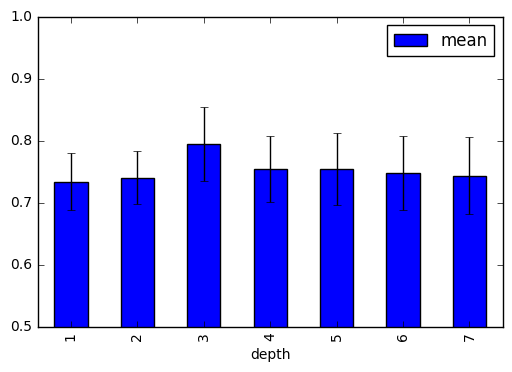

In [44]:
# plot test error per tree depth
df_tree_accuracy.plot.bar(x='depth',y='mean',yerr='std', ylim=[0.5,1])

In [45]:
IFrame('tree depth-3.pdf', width=900, height=500)

<br><br><br><br><br>
___
# Part 2: Bootstrap aggregation (bagging)

## (2.1) Bagging

- Introcued by Breiman in '94
- Decision trees can be noisy (suffer from high-variance)
- Main idea:
    - Construct multiple classifiers (e.g., trees) from the data $f_i(X_1,...,X_p)\rightarrow\{-1,+1\}$
    - Aggregate their prediction $f(X_1,...,X_p)=sign(\sum_{i=1}^B f_i(X_i) )$

- Intuition: 
    - $Z$ is a random variable (classifier) with mean $\mu$ and variance $\sigma^2$ 
    - If we had $B$ independent random variables (classifiers) $Z_1$, $Z_2$, ..., $Z_B$:
        - $\bar{Z}=\frac{1}{B}\sum_{b=1}^B Z_b$
        - Mean: $\mathbb{E}[\bar{Z}]=\mu$
        - Variance: $var(\bar{Z}) = \frac{\sigma^2}{B}$
- But we don't have more data
- Solution: Bootstrap - generate $Z_1,...,Z_B$ from $Z$
    
    
    
<br><br><br><br><br>
___    
## (2.2) Bootstrap  
    
- Original input data (5 data points)
    
<img src="figures/bootstrap1.png" style="max-width:25%;height:auto;"/>

- $B=3$ bootstrapped data sets (with repetition)
    
<img src="figures/bootstrap2.png" style="max-width:80%;height:auto;"/>

- Train $B$ predictive models (e.g., trees): $T_1$, $T_2$, $T_3$ 
- Use average for regression
- Use majority votes for classification



<br><br><br><br><br>
___
## (2.3) Out-of-bag error
- Bootstrap data sets contain a subset of the data
    - on average, about $n/3$ of the observations are excluded
    - reduces dependency between classifiers
- Use those to measure prediction accuracy 
    - calculate out-of-sample error
    - average across all trees
    - small overhead (no need to cross-validate)
    

In [46]:
# Fitting bootstrap aggregation of decision trees of depth 1
base_clf = tree.DecisionTreeClassifier(max_depth=1)
clf = BaggingClassifier(n_estimators=50, base_estimator=base_clf, oob_score=True)
clf = clf.fit(X,Y)    
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean(),scores.std()

(0.79395480225988702, 0.091943593781308092)

In [47]:
# How the size of the bag affects prediction
base_clf = tree.DecisionTreeClassifier(max_depth=1)

results = []
for n in range(1,30,1):
    clf = BaggingClassifier(n_estimators=n, base_estimator=base_clf, oob_score=True)
    clf = clf.fit(X,Y)    
    scores = cross_val_score(clf, X, Y, cv=5)
    #print('n_estimators %d, mean %.2f, std %.2f'%(n,scores.mean(),scores.std()),scores)
    results.append((n,scores.mean(), scores.std(),clf.oob_score_))

    
df_bagging_errors = pd.DataFrame(data=results,columns=['n','CV mean','CV std','OOB score'])
df_bagging_errors

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:603: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:608: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:603: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:608: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:603: UserWarning: Some inputs do not have OOB score

n   CV mean    CV std  OOB score
0    1  0.737175  0.045915   0.612795
1    2  0.770734  0.059949   0.656566
2    3  0.783955  0.069187   0.693603
3    4  0.757401  0.048220   0.710438
4    5  0.757006  0.086754   0.740741
5    6  0.767288  0.060986   0.727273
6    7  0.811017  0.083122   0.734007
7    8  0.737006  0.056429   0.744108
8    9  0.767006  0.090108   0.767677
9   10  0.793955  0.093840   0.750842
10  11  0.780508  0.089800   0.764310
11  12  0.797514  0.082185   0.747475
12  13  0.753842  0.068977   0.757576
13  14  0.784068  0.081655   0.771044
14  15  0.760339  0.079384   0.730640
15  16  0.760339  0.077256   0.744108
16  17  0.760565  0.066480   0.764310
17  18  0.773842  0.082891   0.744108
18  19  0.774181  0.058983   0.760943
19  20  0.773842  0.080165   0.771044
20  21  0.773898  0.078627   0.797980
21  22  0.807571  0.084067   0.760943
22  23  0.774011  0.079825   0.767677
23  24  0.807571  0.073882   0.757576
24  25  0.770508  0.086067   0.764310
25  26  0.787175  0.094584   0.757576
26  27  0.797401  0.085785   0.764310
27  28  0.767062  0.079430   0.777778
28  29  0.760508  0.069889   0.717172

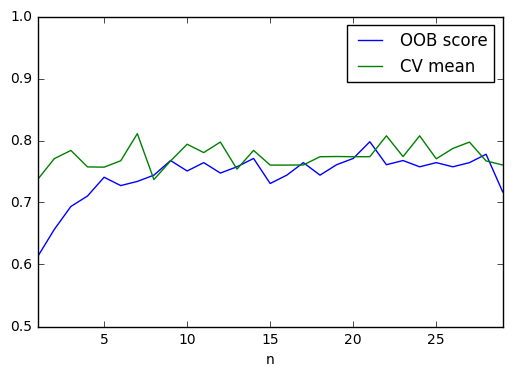

In [48]:
#df_tree_errors.plot.bar(x='n',y='mean',errors='std')
fig, ax = plt.subplots()
df_bagging_errors.plot(x='n',y='OOB score',ylim=[0.5,1],ax=ax)
df_bagging_errors.plot(x='n',y='CV mean',ylim=[0.5,1],ax=ax)

<br><br><br><br><br>
___
## (2.4) Random forests

- Algorithm named and studied by Breiman in '01 and Ho '95
- Revisit bagging:
    - what if one the predictors is very strong?
    - all the trees will use it
    - high correlation
    
    
- Random forests:
    1. Bootstrap $B$ training data sets
    2. For each dataset:
        1. Randomly select $m$ features (out of $p$)
        2. Branch if needed and go back to (A)


- reduces correlation between classifiers
- overall better performance using very simple trees
- if $m=p$ random forests is equivalent to bagging
- in practice, use $m=\sqrt{p}$




### Single tree vs. Bagging vs. Random forest

In [49]:
# create a tree classifier
tree_depth = 1
clf_tree = tree.DecisionTreeClassifier(max_depth=tree_depth)
clf_tree = clf_tree.fit(X,Y)    
clf_tree_scores = cross_val_score(clf_tree, X, Y, cv=5)

# create a Bagging and RF classifier
base_clf = tree.DecisionTreeClassifier(max_depth=tree_depth) # base classifier
results = []
n_range = range(1,40,1)
for n in n_range:
    # bagging classifier with n bootstrapped data sets
    clf_bagging = BaggingClassifier(n_estimators=n, base_estimator=base_clf)
    scores = cross_val_score(clf_bagging, X, Y, cv=5)
    
    # random forest classifier with n bootstrapped data sets m=sqrt(p)
    clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=n, max_depth=tree_depth)
    clf_rf_scores = cross_val_score(clf_rf, X, Y, cv=5)

    results.append((n,scores.mean(), scores.std(),clf_rf_scores.mean(),clf_rf_scores.std(),clf_tree_scores.mean()))
    
df_accuracy = pd.DataFrame(data=results,columns=['n','Bagging accuracy','Bagging error','RF accuracy','RF error','Single tree'])
df_accuracy.index=df_accuracy['n']

# plot cross-validation results
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].axhline(y=clf_tree_scores.mean(),color='k',linestyle='-')
axes[0].axhline(y=clf_tree_scores.mean()+clf_tree_scores.std(),color='k',linestyle='--')
axes[0].axhline(y=clf_tree_scores.mean()-clf_tree_scores.std(),color='k',linestyle='--')
axes[0].set_ylim([0.6,1])
axes[0].set_title('Single tree')
df_accuracy.plot(x='n',y='Bagging accuracy',ylim=[0.6,1],yerr='Bagging error',ax=axes[1],title='Bagging')
df_accuracy.plot(x='n',y='RF accuracy',ylim=[0.6,1],yerr='RF error',ax=axes[2],title='Random forest')

- Improved prediction
- Improved variance
- Do not tend to overfit
- Did we lose anything?

In [50]:
df_accuracy[['Bagging accuracy','RF accuracy','Single tree']].plot()

### Feature importance

In [51]:
# create and fit model
clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=50, max_depth=1)
clf_rf = clf_rf.fit(X,Y)

# plot feature importance
pd.Series(data=clf_rf.feature_importances_, index=X.columns).sort_values().plot.bar()

<br><br><br><br><br>
___

# Part 3: Boosting

## 3.1 Linear summation of models


- The classifiers $f_b$ were constructed independently from bootstrapped data

<img src="figures/figure-bagging1.png" style="max-width:60%;height:auto;"/>

- Bagging and random forests can be written as

<center>
$
f(X_1,...,X_p)=\sum_{b=1}^B f_b(X_1,...,X_p,\gamma_b)
$
</center>




<br><br><br><br><br>
___

## 3.2 Boosting

- Introduced in 1995 by Freund and Schapire
- Alternative approach 
    - without boosting
    - sequentially add classifiers to improve prediction

<img src="figures/figure-boosting1.png" style="max-width:50%;height:auto;"/>

<br>


<center>
$
f(X_1,...,X_p)=\sum_{b=1}^B \beta_b f_b(X_1,...,X_p,\gamma_b)
$
</center>




## 3.3 Boosting for regression trees *
From "An introduction to statistical learning" (Chapter 8)

1. Set $f(x)=0$ and $r_i=y_i$ in the training data set
2. for $b=1,2,...,B$ repeat:
    1. Fit a tree $f^b$ with $d$ splits to the training data $(X,r)$
    2. Update $f$ by adding in a shrunken version of the new tree
<center>
$f(x) \leftarrow f(x) + \lambda f^b(x)$
</center>

    3. Update the residuals
<center>
$r_i \leftarrow r_i - \lambda f^b(x_i)$
</center>

3. Output the boosted model,
<center>
$f(x)=\sum_{b=1}^{B}\lambda f^b(x)$
</center>


$\lambda$ - shrinkage parameter (slows the learning process)

<br><br><br><br><br>
___

## 3.4 Forward stage-wise additive modeling *


* How to learn the parameters $\beta_b$ and $\gamma_b$?

<center>
$f(X_1,...,X_p)=\sum_{b=1}^B \beta_b f_b(X_1,...,X_p,\gamma_b)$
</center>

* Hard optimization problem 

* Heuristic (forward stage-wise additive modeling)
    1. Initialize $f_0 = 0$
    2. For $b=1...B$:
        
        a. Compute 
        <center>
        $
        \beta_b,\gamma_b = arg \min_{\beta,\gamma} \sum_{i=1}^{N}L(y_i,f_{m-1}(\bar{x}_i)+\beta f(\bar{x}_i,\gamma))
        $
        </center>

        b. Set $f_m=f_{m-1} + \beta_b f(x,\gamma_b)$  


<br><br><br><br><br>
___
## (3.5) Forward stage-wise additive modeling - Example *

\* An inuitive rather than rigour discussion. See Chapter 14.3 in Bishop for more details.
* b=1
    - find a tree $f_1$ using the data $\{X,Y\}$ 
* b=2
    - find a tree $f_2$ and a constant $\beta_2$ that optimizes the prediction $f_1+\beta_2f_2$
* b=3
    - find a tree $f_3$ and a constant $\beta_3$ that optimizes the prediction $f_1+\beta_2f_2+\beta_3f_3$
* Stop after $B$ steps (iterations)

* Use $f_1+\beta_2f_2+\beta_3f_3+...+\beta_Bf_B$ for prediction

<br><br><br><br><br>
___

## (3.6) Boosting - cont.

* Boosting works well even with very simple classifiers (weak learners)
    * Error rate close to 0.5
    * Why error rate always below 0.5?
* AdaBoost.M1
    * Decision stump - tree with a single split
    * Exponential loss (error) function
* The heuristic is a managable optimization problem    


In [52]:
clf = AdaBoostClassifier()
clf = clf.fit(X,Y)
clf.score(X,Y)

0.91919191919191923

In [53]:
df_accuracy=df_accuracy.ix[:,:6]

In [54]:
res_boosting_mean = []
res_boosting_std = []
for n in n_range:
    clf_boosting = AdaBoostClassifier(n_estimators=n, learning_rate=0.5)
    clf_boosting_scores = cross_val_score(clf_boosting, X, Y, cv=5)
    res_boosting_mean.append(clf_boosting_scores.mean())
    res_boosting_std.append(clf_boosting_scores.std())
df_boosting = pd.DataFrame({'Boosting accuracy':res_boosting_mean,'Boosting error':res_boosting_std},index=n_range)
df_accuracy = pd.concat([df_accuracy,df_boosting],axis=1)

In [55]:
df_accuracy[['Boosting accuracy','Bagging accuracy','RF accuracy','Single tree']].plot(figsize=(10,6))

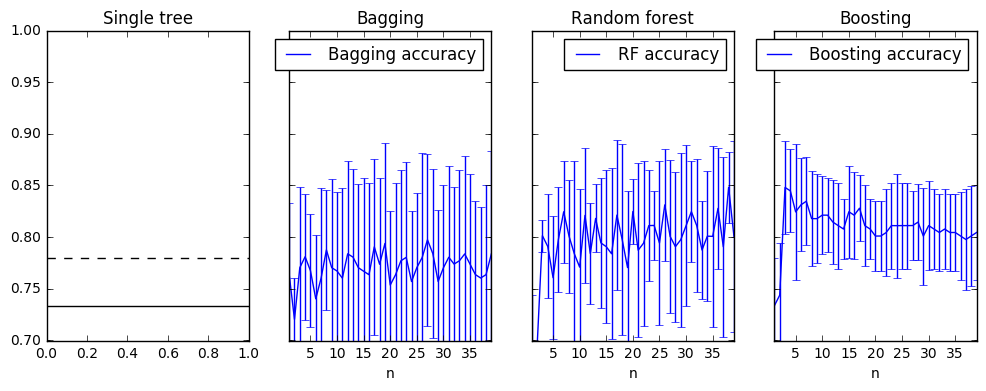

In [56]:
fig, axes = plt.subplots(1,4, figsize=(12,4),sharey=True)
axes[0].axhline(y=clf_tree_scores.mean(),color='k',linestyle='-')
axes[0].axhline(y=clf_tree_scores.mean()+clf_tree_scores.std(),color='k',linestyle='--')
axes[0].axhline(y=clf_tree_scores.mean()-clf_tree_scores.std(),color='k',linestyle='--')
axes[0].set_ylim([0.7,1])
axes[0].set_title('Single tree')
df_accuracy.plot(x='n',y='Bagging accuracy',ylim=[0.7,1],yerr='Bagging error',ax=axes[1],title='Bagging')
df_accuracy.plot(x='n',y='RF accuracy',ylim=[0.7,1],yerr='RF error',ax=axes[2],title='Random forest')
df_accuracy.plot(x='n',y='Boosting accuracy',ylim=[0.7,1],yerr='Boosting error',ax=axes[3],title='Boosting')

Boosting may overfit data:
- shrinkage parameter
- total number of classifiers

# Summary

- Combining models to form strong classifiers
    - Classification and regression trees
    - Bagging
    - Random forests
    - Boosting
- Many weak classifiers can form extremely strong one
- Bagging/Boosting are meta-algorithms (not only on trees)
- References
    - An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani
    - Pattern Recognition and Machine Learning by Christopher Bishop 

